# Convert cities location data to json format

Data from https://developers.google.com/public-data/docs/canonical/countries_csv

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
np.genfromtxt?

In [4]:
cities = pd.read_csv('cities.csv');

In [5]:
type(cities)

pandas.core.frame.DataFrame

In [6]:
cities.loc[0][1]

23.424075999999999

In [7]:
citiesDict = {}
for i in range(cities.shape[0]):
    citiesDict[cities.loc[i][3]] = [cities.loc[i][1],cities.loc[i][2]]

In [8]:
import json
f = open('citiesLocation.json','w')
a = json.dumps(citiesDict,indent=2)
f.write(a)
f.close()

In [9]:
!mv citiesLocation.json ../../web/app//data/.

# Draw them in a sphere

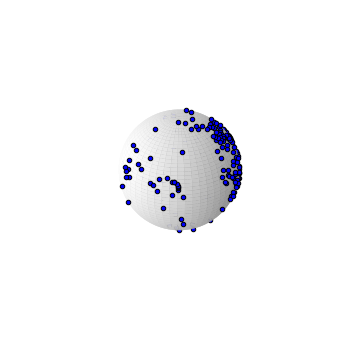

In [10]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9*1.5,4*1.5))
ax = fig.add_subplot(111, projection='3d')

#sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
xs = 10 * np.outer(np.cos(u), np.sin(v))
ys = 10 * np.outer(np.sin(u), np.sin(v))
zs = 10 * np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(xs, ys, zs, rstride=2, cstride=2, color='w', lw=0)


#points
deg2rad=np.pi/180.
for i in range(cities.shape[0]):
    lat,lon= [cities.loc[i][1],cities.loc[i][2]]
#     print lat
    xp = 10.*np.cos(lat*deg2rad)*np.cos(lon*deg2rad)
    yp = 10.*np.cos(lat*deg2rad)*np.sin(lon*deg2rad)
    zp = 10.*np.sin(lat*deg2rad)

    ax.scatter(xp,yp,zp)

ax.set_aspect(1)
ax.set_axis_off()